<a href="https://colab.research.google.com/github/chandru-2001/Facial_Detecto/blob/main/facial_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
import os

print("Please upload your Kaggle dataset zip file:")
print("1. Click 'Choose Files' below")
print("2. Select your archive.zip file")
print("3. Wait for the upload to complete")

uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        file_size = len(uploaded[filename])  # Get bytes length
        print(f"Uploaded: {filename} ({file_size / (1024*1024):.2f} MB)")

        if filename != 'archive.zip':
            if os.path.exists('archive.zip'):
                os.remove('archive.zip')
            os.rename(filename, 'archive.zip')
            print("Renamed to archive.zip")
else:
    print("No file uploaded. Please run this cell again.")
    print("No file uploaded. Please run this cell again.")


📤 Please upload your Kaggle dataset zip file:
1. Click 'Choose Files' below
2. Select your archive.zip file
3. Wait for upload to complete


Saving archive.zip to archive.zip
✅ Uploaded: archive.zip (333.37 MB)


🚀 Starting Facial Recognition System...
✅ Folders created

📦 Extracting dataset...
Found 50000 files in archive
✅ Extraction successful!

🔍 Searching for images...
✅ Found 50000 images
Sample images:
  - 022453.jpg
  - 004225.jpg
  - 019462.jpg
  - 027423.jpg
  - 019467.jpg
👤 Facial Recognition System Ready!

📸 Upload a photo for recognition:


Saving robertdowneyjr_cahalloffameinductee.png to robertdowneyjr_cahalloffameinductee (1).png
✅ Saved: robertdowneyjr_cahalloffameinductee (1).png

🎯 Processing: robertdowneyjr_cahalloffameinductee (1).png
✅ Found 1 face(s)
🔍 Searching dataset...
  Checked 100/50000 images...
  Checked 200/50000 images...
  Checked 300/50000 images...
  Checked 400/50000 images...
  Checked 500/50000 images...
  Checked 600/50000 images...
  Checked 700/50000 images...
  Checked 800/50000 images...
  Checked 900/50000 images...
  Checked 1000/50000 images...
  Checked 1100/50000 images...
  Checked 1200/50000 images...
  Checked 1300/50000 images...
  Checked 1400/50000 images...
  Checked 1500/50000 images...
  Checked 1600/50000 images...
  Checked 1700/50000 images...
  Checked 1800/50000 images...
  Checked 1900/50000 images...
  Checked 2000/50000 images...
  Checked 2100/50000 images...
  Checked 2200/50000 images...
  Checked 2300/50000 images...
  Checked 2400/50000 images...
  Checked 2500/500

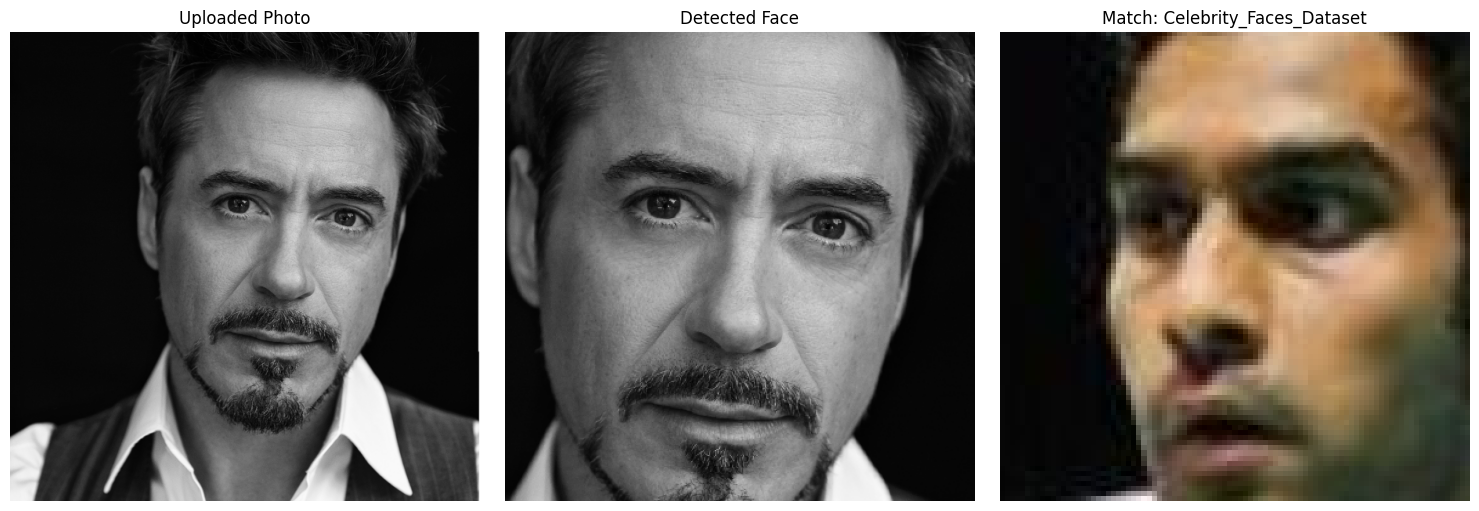

In [ ]:

import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

print("Starting Facial Recognition System...")

def setup_folders():
    folders = ['dataset', 'test_photos', 'results']
    for folder in folders:
        if not os.path.exists(folder):
            os.makedirs(folder)
    print("Folders created")

setup_folders()

# Extract dataset
def extract_dataset():
    print("\nExtracting dataset...")

    if not os.path.exists('archive.zip'):
        print("archive.zip not found. Please upload it first.")
        return False

    try:
        with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
            file_list = zip_ref.namelist()
            print(f"Found {len(file_list)} files in the archive")

            zip_ref.extractall('dataset')
            print("Extraction completed")

        return True
    except Exception as e:
        print(f"Extraction error: {e}")
        return False

extract_dataset()

# Find all images in dataset
def find_all_images():
    print("\nSearching for images...")

    image_files = []

    for root, dirs, files in os.walk('dataset'):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                full_path = os.path.join(root, file)
                image_files.append(full_path)

    print(f"Found {len(image_files)} images")

    if image_files:
        print("Sample images:")
        for img in random.sample(image_files, min(5, len(image_files))):
            print(f"  - {os.path.basename(img)}")

    return image_files

all_images = find_all_images()

# Fixed face detection
def find_faces(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None, []

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        face_cascade = cv2.CascadeClassifier(
            cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
        )

        faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        return img, faces
    except Exception as e:
        print(f"Error in face detection: {e}")
        return None, []

# Feature extraction
def get_face_features(face_img):
    if face_img is None or face_img.size == 0:
        return None

    try:
        face_resized = cv2.resize(face_img, (100, 100))
        gray_face = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)

        hist = cv2.calcHist([gray_face], [0], None, [64], [0, 256])
        cv2.normalize(hist, hist)

        return hist.flatten()
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return None

# Compare faces
def compare_faces(features1, features2):
    if features1 is None or features2 is None:
        return 0.0

    try:
        correlation = cv2.compareHist(
            features1.astype(np.float32),
            features2.astype(np.float32),
            cv2.HISTCMP_CORREL
        )

        similarity = (correlation + 1) / 2
        return max(0.0, min(1.0, similarity))
    except Exception as e:
        print(f"Error in comparison: {e}")
        return 0.0

# Main recognition
def identify_person(test_image_path):
    print(f"\nProcessing: {os.path.basename(test_image_path)}")

    test_img, test_faces = find_faces(test_image_path)

    if test_faces is None or len(test_faces) == 0:
        print("No face detected")
        return None

    print(f"Detected {len(test_faces)} face(s)")

    x, y, w, h = test_faces[0]
    test_face = test_img[y:y+h, x:x+w]
    test_features = get_face_features(test_face)

    if test_features is None:
        print("Failed to extract features")
        return None

    best_match = None
    best_score = 0
    checked_count = 0

    print("Searching dataset...")

    for dataset_image in all_images:
        checked_count += 1
        if checked_count % 100 == 0:
            print(f"  Checked {checked_count}/{len(all_images)} images...")

        dataset_img, dataset_faces = find_faces(dataset_image)

        if dataset_faces is None or len(dataset_faces) == 0:
            continue

        for dx, dy, dw, dh in dataset_faces:
            dataset_face = dataset_img[dy:dy+dh, dx:dx+dw]
            dataset_features = get_face_features(dataset_face)

            if dataset_features is None:
                continue

            similarity = compare_faces(test_features, dataset_features)

            if similarity > best_score:
                best_score = similarity
                best_match = {
                    'image_path': dataset_image,
                    'face_image': dataset_face,
                    'similarity': similarity,
                    'name': os.path.basename(os.path.dirname(dataset_image)) or "Unknown"
                }

    print(f"Completed search through {checked_count} images")

    if best_match and best_score > 0.5:
        print(f"Match found with {best_score:.1%} confidence")
        return {
            'name': best_match['name'],
            'confidence': best_score,
            'test_face': test_face,
            'match_face': best_match['face_image'],
            'source': best_match['image_path']
        }
    elif best_match:
        print(f"Best match only has {best_score:.1%} confidence (below threshold)")
    else:
        print("No suitable match found")

    return None

# Upload test photo
def upload_test_photo():
    from google.colab import files

    print("\nUpload a photo for recognition:")
    uploaded = files.upload()

    if not uploaded:
        print("No photo uploaded")
        return None

    for filename, content in uploaded.items():
        file_path = os.path.join('test_photos', filename)
        with open(file_path, 'wb') as f:
            f.write(content)
        print(f"Saved: {filename}")
        return file_path

    return None

# Display results
def show_result(result, test_image_path):
    if not result:
        print("\nNo match found in dataset")
        return

    print("\n" + "="*50)
    print("FACE RECOGNIZED")
    print("="*50)
    print(f"Person: {result['name']}")
    print(f"Confidence: {result['confidence']:.1%}")
    print("="*50)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    test_img = cv2.imread(test_image_path)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(test_img_rgb)
    axes[0].set_title('Uploaded Photo')
    axes[0].axis('off')

    test_face_rgb = cv2.cvtColor(result['test_face'], cv2.COLOR_BGR2RGB)
    axes[1].imshow(test_face_rgb)
    axes[1].set_title('Detected Face')
    axes[1].axis('off')

    match_face_rgb = cv2.cvtColor(result['match_face'], cv2.COLOR_BGR2RGB)
    axes[2].imshow(match_face_rgb)
    axes[2].set_title(f'Match: {result["name"]}')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Run the system
def main():
    print("Facial Recognition System Ready")

    if not all_images:
        print("No images found in dataset")
        return

    test_photo = upload_test_photo()
    if not test_photo:
        return

    result = identify_person(test_photo)
    show_result(result, test_photo)

main()
